In [1]:
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
audio = tfio.audio.AudioIOTensor('test.mp3')
#print(audio)
print(audio[:10, 0])

NotFoundError: test.mp3; No such file or directory [Op:IO>AudioReadableInit]

In [5]:
#audio = tfio.audio.AudioIOTensor('gs://cloud-samples-tests/speech/brooklyn.flac')
#print(audio.rate.numpy())
#audio_slice = tf.slice(audio)
"""
audio_slice = audio[100:]

audio_slice = audio[:,0]
print(audio_slice)

# remove last dimension
audio_tensor = tf.squeeze(audio_slice, axis=[-1])

print(audio_tensor)

"""

'\naudio_slice = audio[100:]\n\naudio_slice = audio[:,0]\nprint(audio_slice)\n\n# remove last dimension\naudio_tensor = tf.squeeze(audio_slice, axis=[-1])\n\nprint(audio_tensor)\n\n'

In [5]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 3], [4, 4, 4]],
                 [[5, 5, 5], [6, 6, 6]]])
print(t.shape)
#print(t)

(3, 2, 3)


In [10]:
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

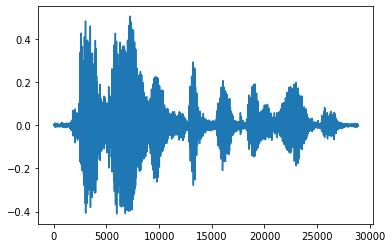

In [11]:
tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

tf.Tensor([ 2398 23546], shape=(2,), dtype=int64)
tf.Tensor(2398, shape=(), dtype=int64) tf.Tensor(23546, shape=(), dtype=int64)


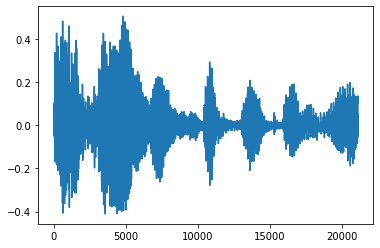

In [13]:
position = tfio.experimental.audio.trim(tensor, axis=0, epsilon=0.1)
print(position)

start = position[0]
stop = position[1]
print(start, stop)

processed = tensor[start:stop]

plt.figure()
plt.plot(processed.numpy())

Audio(processed.numpy(), rate=audio.rate.numpy())

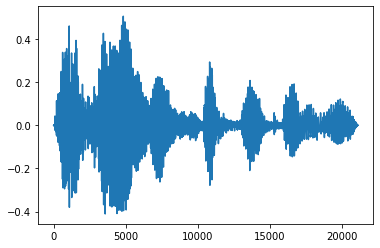

In [14]:
fade = tfio.experimental.audio.fade(
    processed, fade_in=1000, fade_out=2000, mode="logarithmic")

plt.figure()
plt.plot(fade.numpy())
Audio(fade.numpy(), rate=audio.rate.numpy())